# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [119]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

### Read the csv data into a pandas dataframe and display the first 5 samples

In [122]:
df = pd.read_csv('Real_estate.csv')
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


### Show more information about the dataset

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [128]:
df.shape

(414, 8)

### What are the features available in the dataset?

In [131]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [134]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

### Group all the features as dependent features in X

In [137]:
X = df.drop(columns=['Y house price of unit area'])
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [140]:
y=df['Y house price of unit area']
y

0      37.9
1      42.2
2      47.3
3      54.8
4      43.1
       ... 
409    15.4
410    50.0
411    40.6
412    52.5
413    63.9
Name: Y house price of unit area, Length: 414, dtype: float64

### Split the dataset into train and test data

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Choose the model (Linear Regression)

In [146]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [149]:
model = LinearRegression()

### Train the model

In [152]:
model.fit(X_train,y_train)

LinearRegression()

### 
Apply the model

In [155]:
prediction=model.predict(X_test)
print("Predictions:", prediction)

Predictions: [47.04645871 40.40783016 43.37463978 39.20600382 26.62817953 45.8923956
 44.33888897 46.74448468 24.43235155 55.06258487 34.60848974 36.92386329
 36.76420984 24.30494918 35.79519845 33.44810036 44.24993318 44.98654734
 29.18096544 44.80711275  1.15259949 36.10694406 47.26486776 45.90792727
 10.96198835 38.69069634 12.57701679 43.61237869 35.7142565  37.55475044
 14.14012034 40.46209983 35.90891223 28.5174525  47.38286733 30.9022379
 50.43545093 12.92669013 48.95222574 39.27068588 39.3872837  40.09381011
 48.20107097 37.08010208 39.54765933 47.348201   43.3815801  21.07747224
 47.05299802 44.57951775 48.24233055 48.12297596 41.42189435 42.25141469
 36.32214409 15.69024514 37.64733588 35.12221291 29.08561558 46.86297981
 32.07763941 33.25961566 15.22965501  9.01697131  9.37929873 33.78712833
 29.59931587 47.50139803 33.81312917 31.84174056 46.48732668 38.98112924
 46.72835605 45.6962431  35.99239567 38.58963559 38.0020306  36.55979271
 41.37412002 32.65154281 42.60853061 43.

### Display the coefficients

In [158]:
model.coef_

array([-5.61695287e-03,  5.40743502e+00, -2.67827999e-01, -4.81543315e-03,
        1.08114445e+00,  2.26048799e+02, -3.01254914e+01])

### Find how well the trained model did with testing data

In [161]:
r2 = r2_score(y_test, prediction)
r2

0.6745228670350869

### Plot House Age Vs Price
#### Hint: Use regplot in sns

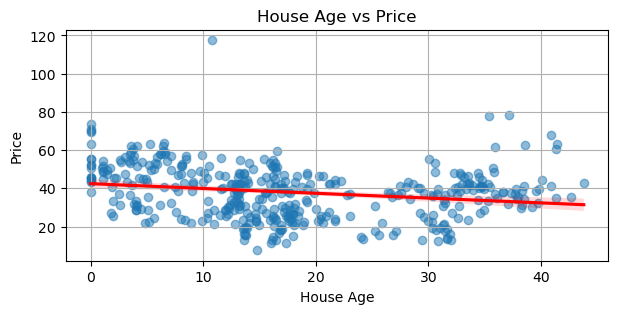

In [164]:
df['Y house price of unit area'] = y  # Replace 'y' with the actual price data if necessary

# Create a regplot for House Age (X2) vs Price
plt.figure(figsize=(7, 3))
sns.regplot(x='X2 house age', y='Y house price of unit area', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('House Age vs Price')
plt.xlabel('House Age')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Plot Distance to MRT station Vs Price

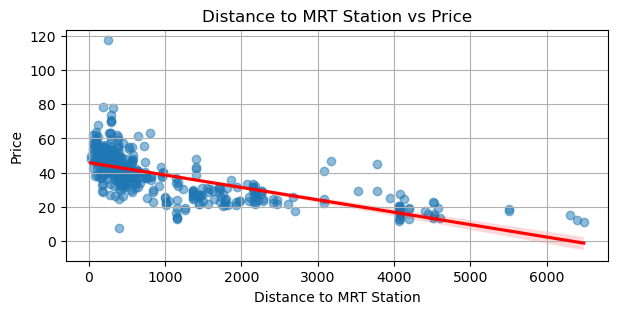

In [167]:
plt.figure(figsize=(7, 3))
sns.regplot(x='X3 distance to the nearest MRT station', y='Y house price of unit area', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Distance to MRT Station vs Price')
plt.xlabel('Distance to MRT Station')
plt.ylabel('Price')
plt.grid(True)
plt.show()

### Plot Number of Convienience Stores Vs Price

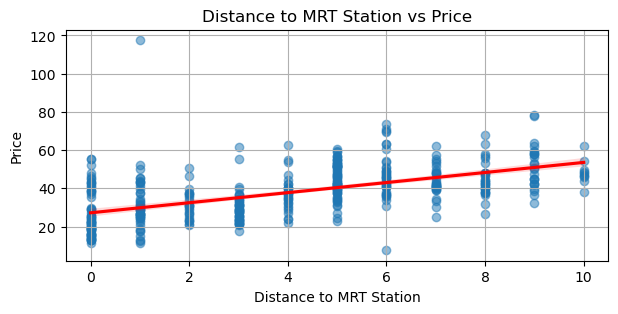

In [170]:
plt.figure(figsize=(7, 3))
sns.regplot(x='X4 number of convenience stores', y='Y house price of unit area', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Distance to MRT Station vs Price')
plt.xlabel('Distance to MRT Station')
plt.ylabel('Price')
plt.grid(True)
plt.show()